<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/airbnb_price_regression_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

dammam_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_10/data/dammam.parquet'

df=pd.read_parquet(dammam_link)
df.head()

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool
0,2021-01-20 03:52:47.315742,None,http://airbnb.com/rooms/45922230,Luxuries Apartment at Luxuries Complex,Entire apartment,Al Khobar,3.0,2.0,3.0,False,3.0,NaN,NaN,145.0,5.00,20.0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2021-01-20 03:52:47.315742,None,http://airbnb.com/rooms/41146741,Nozol Apartment,Entire apartment,Al Khobar,6.0,2.0,6.0,False,1.0,NaN,NaN,96.0,4.91,11.0,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,2021-01-20 03:52:47.315742,None,http://airbnb.com/rooms/46294085,دخول ذكي Home,Entire apartment,Al Khobar,NaN,1.0,NaN,False,1.0,NaN,NaN,87.0,4.76,25.0,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2021-01-20 03:52:47.315742,None,http://airbnb.com/rooms/39144903,Easy to reach ..البركه,Entire apartment,Dammam,NaN,1.0,NaN,False,2.0,NaN,NaN,120.0,4.94,17.0,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2021-01-20 03:52:47.315742,None,http://airbnb.com/rooms/46460208,Anna Apartments,Entire apartment,Al Khobar,2.0,2.0,2.0,False,1.5,NaN,NaN,121.0,5.00,13.0,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.duplicated().sum()

0

####Date Info 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ds                       3015 non-null   object 
 1   search_filter            2009 non-null   object 
 2   url                      3015 non-null   object 
 3   title                    3015 non-null   object 
 4   type                     3015 non-null   object 
 5   location                 3015 non-null   object 
 6   guests                   1907 non-null   float64
 7   bedrooms                 3015 non-null   float64
 8   beds                     1907 non-null   float64
 9   is_studio                3015 non-null   bool   
 10  baths                    2051 non-null   float64
 11  half_baths               0 non-null      float64
 12  shared_baths             21 non-null     float64
 13  price                    3015 non-null   float64
 14  avg_rating              

In [ ]:
df.describe()

,guests,bedrooms,beds,baths,half_baths,shared_baths,price,avg_rating,n_reviews
count,1907.000000,3015.000000,1907.000000,2051.000000,0.0,21.000000,3015.000000,1001.000000,1001.000000
mean,2.487677,1.373134,2.487677,1.647001,NaN,1.952381,188.606302,4.454466,11.054945
std,1.763341,1.531274,1.763341,0.953665,NaN,0.150396,262.843146,0.783735,8.586966
min,0.000000,0.000000,0.000000,0.000000,NaN,1.500000,11.000000,2.500000,3.000000
25%,2.000000,1.000000,2.000000,1.000000,NaN,2.000000,51.000000,4.170000,4.000000
50%,2.000000,1.000000,2.000000,1.000000,NaN,2.000000,110.000000,4.900000,10.000000
75%,3.000000,2.000000,3.000000,2.000000,NaN,2.000000,204.000000,5.000000,15.000000
max,14.000000,50.000000,14.000000,7.000000,NaN,2.000000,2162.000000,5.000000,89.000000


In [ ]:
df.shape

(3015, 40)

####Prococing

In [ ]:
df.isnull().sum()

ds                            0
search_filter              1006
url                           0
title                         0
type                          0
location                      0
guests                     1108
bedrooms                      0
beds                       1108
is_studio                     0
baths                       964
half_baths                 3015
shared_baths               2994
price                         0
avg_rating                 2014
n_reviews                  2014
gym_bool                      0
wifi_bool                     0
self_check_in_bool            0
air_conditioning_bool         0
pets_allowed_bool             0
indoor_fireplace_bool         0
hot_tub_bool                  0
free_parking_bool             0
pool_bool                     0
kitchen_bool                  0
breakfast_bool                0
elevator_bool                 0
washer_bool                   0
dryer_bool                    0
heating_bool                  0
waterfro

In [ ]:
missing_val = df.isnull().sum()
missing_val[missing_val>0]

search_filter    1006
guests           1108
beds             1108
baths             964
half_baths       3015
shared_baths     2994
avg_rating       2014
n_reviews        2014
dtype: int64

In [ ]:
#calculate percentage of missing values
missing_percentage = missing_val/(len(df))*100
missing_percentage.sort_values(inplace=True)

In [ ]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


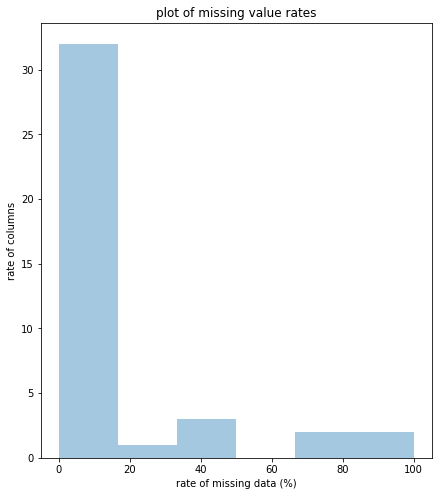

In [ ]:
#plot missing values in each columns
import seaborn as sns    
%matplotlib inline
plt.rcParams['figure.figsize']=(7,8)
#missingValues_columns = missingValues_columns[missingValues_columns > 0]/(azdias_clean.shape[0])

missingValues_columns =(df.isnull().sum()/len(df))*100
sns.distplot(missingValues_columns, kde = False).set_title('plot of missing value rates');
plt.xlabel('rate of missing data (%)')
plt.ylabel('rate of columns')
plt.show();


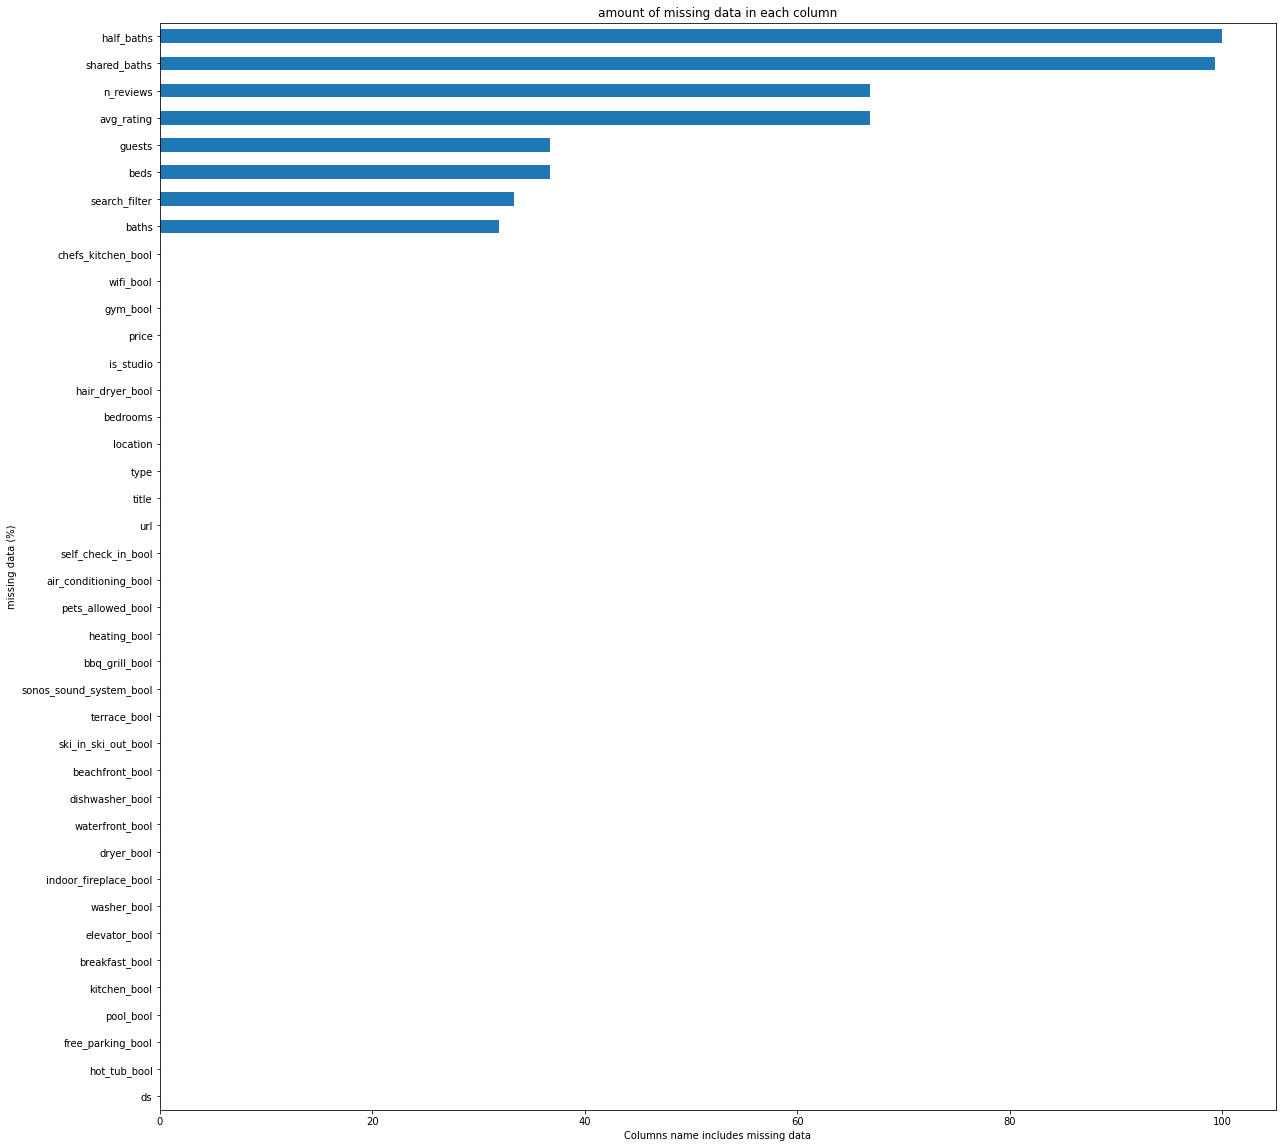

In [ ]:
# Investigate patterns in the amount of missing data in each column.
missingValues_columns.sort_values(inplace=True)
missingValues_columns.plot.barh(figsize=(20,20))
plt.xlabel('Columns name includes missing data')
plt.ylabel('missing data (%)')
plt.title("amount of missing data in each column")

plt.show();


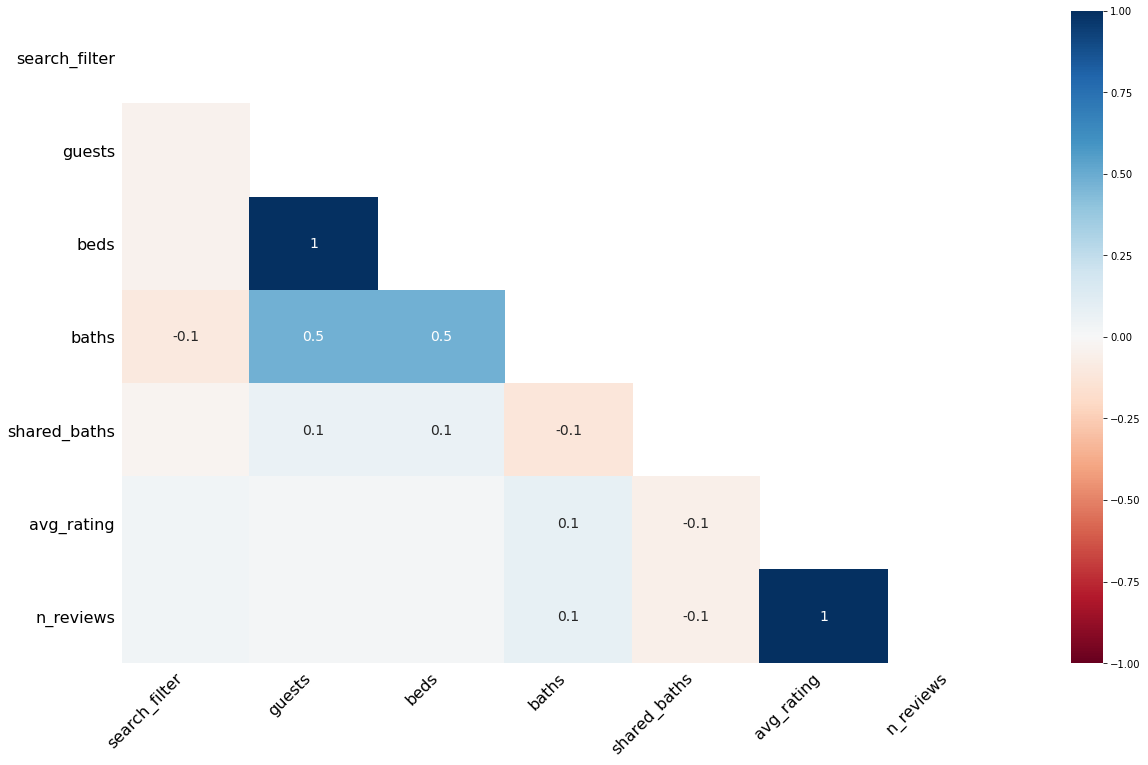

In [ ]:
import missingno as msno
# confusion matrix for missing values
msno.heatmap(df);

In [ ]:
df =df.drop(columns=['half_baths','shared_baths'])

In [ ]:
df['n_reviews'] = df['n_reviews'].fillna(df['n_reviews'].mode()[0])

In [ ]:
df['avg_rating'] = df['avg_rating'].fillna(df['avg_rating'].mode()[0])

In [ ]:
df.isnull().sum()

ds                            0
search_filter              1006
url                           0
title                         0
type                          0
location                      0
guests                     1108
bedrooms                      0
beds                       1108
is_studio                     0
baths                       964
price                         0
avg_rating                    0
n_reviews                     0
gym_bool                      0
wifi_bool                     0
self_check_in_bool            0
air_conditioning_bool         0
pets_allowed_bool             0
indoor_fireplace_bool         0
hot_tub_bool                  0
free_parking_bool             0
pool_bool                     0
kitchen_bool                  0
breakfast_bool                0
elevator_bool                 0
washer_bool                   0
dryer_bool                    0
heating_bool                  0
waterfront_bool               0
dishwasher_bool               0
beachfro

In [ ]:
df['guests'] = df['guests'].fillna(df['guests'].mean())

In [ ]:
df['beds'] = df['beds'].fillna(df['beds'].mean())

In [ ]:
df['baths'] = df['baths'].fillna(df['baths'].mean())

In [ ]:
df.search_filter.unique()

array([None, 'super_hosts', 'entire_homes', 'entire_home_super_hosts',
       'hotel_rooms', 'private_rooms', 'shared_rooms'], dtype=object)

In [ ]:
df['search_filter'].astype(str)

0               None
1               None
2               None
3               None
4               None
            ...     
3010    shared_rooms
3011    shared_rooms
3012    shared_rooms
3013    shared_rooms
3014    shared_rooms
Name: search_filter, Length: 3015, dtype: object

In [ ]:
df['search_filter'].fillna('No Value', inplace=True)

In [ ]:
df.isnull().sum()

ds                         0
search_filter              0
url                        0
title                      0
type                       0
location                   0
guests                     0
bedrooms                   0
beds                       0
is_studio                  0
baths                      0
price                      0
avg_rating                 0
n_reviews                  0
gym_bool                   0
wifi_bool                  0
self_check_in_bool         0
air_conditioning_bool      0
pets_allowed_bool          0
indoor_fireplace_bool      0
hot_tub_bool               0
free_parking_bool          0
pool_bool                  0
kitchen_bool               0
breakfast_bool             0
elevator_bool              0
washer_bool                0
dryer_bool                 0
heating_bool               0
waterfront_bool            0
dishwasher_bool            0
beachfront_bool            0
ski_in_ski_out_bool        0
terrace_bool               0
sonos_sound_sy

In [ ]:
df.head()

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool
0,2021-01-20 03:52:47.315742,No Value,http://airbnb.com/rooms/45922230,Luxuries Apartment at Luxuries Complex,Entire apartment,Al Khobar,3.000000,2.0,3.000000,False,3.0,145.0,5.00,20.0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2021-01-20 03:52:47.315742,No Value,http://airbnb.com/rooms/41146741,Nozol Apartment,Entire apartment,Al Khobar,6.000000,2.0,6.000000,False,1.0,96.0,4.91,11.0,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,2021-01-20 03:52:47.315742,No Value,http://airbnb.com/rooms/46294085,دخول ذكي Home,Entire apartment,Al Khobar,2.487677,1.0,2.487677,False,1.0,87.0,4.76,25.0,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2021-01-20 03:52:47.315742,No Value,http://airbnb.com/rooms/39144903,Easy to reach ..البركه,Entire apartment,Dammam,2.487677,1.0,2.487677,False,2.0,120.0,4.94,17.0,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2021-01-20 03:52:47.315742,No Value,http://airbnb.com/rooms/46460208,Anna Apartments,Entire apartment,Al Khobar,2.000000,2.0,2.000000,False,1.5,121.0,5.00,13.0,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#convert ds to datatime
df['DateTime'] = pd.to_datetime(df['ds'])

In [ ]:
#split year into new column
df['year'] = df['DateTime'].dt.year
#split month into new column
df['month'] = df['DateTime'].dt.month
#split day into new column
df['day'] = df['DateTime'].dt.day

In [ ]:
df.head(1)

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool,DateTime,year,month,day
0,2021-01-20 03:52:47.315742,No Value,http://airbnb.com/rooms/45922230,Luxuries Apartment at Luxuries Complex,Entire apartment,Al Khobar,3.0,2.0,3.0,False,3.0,145.0,5.0,20.0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021-01-20 03:52:47.315742,2021,1,20


In [ ]:
df.drop(['ds', 'url', 'DateTime', 'title'], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

202

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
#df['url'].to_string()

In [ ]:
#df['url'].astype(str)

In [ ]:
df.location.unique()

array(['Al Khobar', 'Dammam', 'Aziziah', 'Dhahran', 'serviced apartment',
       'Dammam ', 'Khobar ', 'Az Zahran', 'Arrakah ', 'Khobar',
       'الدمام\u200e', 'Eastern Province', 'الخبر', 'Seef', 'Manama',
       'Sea Front', 'Muharraq Governorate', 'Al Maqsha',
       'Dilmonia Island', 'Amwaj Islands', 'Half Moon Bay',
       'Al Khobar, Dhahran', 'Durrat Al Bahrain', 'Al Markh', 'المنامة',
       'Al-Muḥāfaẓat aš-Šamālīyah', 'Al Eker', 'boutique hotel'],
      dtype=object)

In [ ]:
df.location = df['location'].replace(['الخبر','Khobar', 'Khobar ', 'Eastern Province'],'Al Khobar')
df.location = df['location'].replace(['Al Khobar, Dhahran'],'Dhahran')
df.location = df['location'].replace(['الدمام\u200e', 'Dammam '],'Dammam')
df.location = df['location'].replace(['المنامة'],'Manama')

In [ ]:
df.head()

,search_filter,type,location,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool,year,month,day
0,No Value,Entire apartment,Al Khobar,3.000000,2.0,3.000000,False,3.0,145.0,5.00,20.0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,1,20
1,No Value,Entire apartment,Al Khobar,6.000000,2.0,6.000000,False,1.0,96.0,4.91,11.0,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,2021,1,20
2,No Value,Entire apartment,Al Khobar,2.487677,1.0,2.487677,False,1.0,87.0,4.76,25.0,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,1,20
3,No Value,Entire apartment,Dammam,2.487677,1.0,2.487677,False,2.0,120.0,4.94,17.0,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,1,20
4,No Value,Entire apartment,Al Khobar,2.000000,2.0,2.000000,False,1.5,121.0,5.00,13.0,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021,1,20


In [ ]:
df.is_studio.unique()

array([False,  True])

In [ ]:
for col in df.columns[df.dtypes == 'bool']:
    df[col] = df[col].map({True: 1, False: 0})

In [ ]:
df.head()

,search_filter,type,location,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool,year,month,day
0,No Value,Entire apartment,Al Khobar,3.000000,2.0,3.000000,0,3.0,145.0,5.00,20.0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20
1,No Value,Entire apartment,Al Khobar,6.000000,2.0,6.000000,0,1.0,96.0,4.91,11.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2021,1,20
2,No Value,Entire apartment,Al Khobar,2.487677,1.0,2.487677,0,1.0,87.0,4.76,25.0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20
3,No Value,Entire apartment,Dammam,2.487677,1.0,2.487677,0,2.0,120.0,4.94,17.0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20
4,No Value,Entire apartment,Al Khobar,2.000000,2.0,2.000000,0,1.5,121.0,5.00,13.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20


In [ ]:
cat_col = [col for col in df.columns if df[col].dtype=='O']
cat_col

['search_filter', 'type', 'location']

In [ ]:
categorical = df[cat_col]
categorical.head()

,search_filter,type,location
0,No Value,Entire apartment,Al Khobar
1,No Value,Entire apartment,Al Khobar
2,No Value,Entire apartment,Al Khobar
3,No Value,Entire apartment,Dammam
4,No Value,Entire apartment,Al Khobar


In [ ]:
int_col = [col for col in df.columns if df[col].dtype!='O']
int_col

['guests',
 'bedrooms',
 'beds',
 'is_studio',
 'baths',
 'price',
 'avg_rating',
 'n_reviews',
 'gym_bool',
 'wifi_bool',
 'self_check_in_bool',
 'air_conditioning_bool',
 'pets_allowed_bool',
 'indoor_fireplace_bool',
 'hot_tub_bool',
 'free_parking_bool',
 'pool_bool',
 'kitchen_bool',
 'breakfast_bool',
 'elevator_bool',
 'washer_bool',
 'dryer_bool',
 'heating_bool',
 'waterfront_bool',
 'dishwasher_bool',
 'beachfront_bool',
 'ski_in_ski_out_bool',
 'terrace_bool',
 'sonos_sound_system_bool',
 'bbq_grill_bool',
 'hair_dryer_bool',
 'chefs_kitchen_bool',
 'year',
 'month',
 'day']

In [ ]:
categorical_dum = pd.get_dummies(categorical)
categorical_dum.head()

,search_filter_No Value,search_filter_entire_home_super_hosts,search_filter_entire_homes,search_filter_hotel_rooms,search_filter_private_rooms,search_filter_shared_rooms,search_filter_super_hosts,type_Camper/RV,type_Earth house,type_Entire apartment,type_Entire bungalow,type_Entire chalet,type_Entire house,type_Entire loft,type_Entire place,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Farm stay,type_Hotel room,type_Private room,type_Room,type_Shared room,location_Al Eker,location_Al Khobar,location_Al Maqsha,location_Al Markh,location_Al-Muḥāfaẓat aš-Šamālīyah,location_Amwaj Islands,location_Arrakah,location_Az Zahran,location_Aziziah,location_Dammam,location_Dhahran,location_Dilmonia Island,location_Durrat Al Bahrain,location_Half Moon Bay,location_Manama,location_Muharraq Governorate,location_Sea Front,location_Seef,location_boutique hotel,location_serviced apartment
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
categorical_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813 entries, 0 to 3014
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   search_filter_No Value                 2813 non-null   uint8
 1   search_filter_entire_home_super_hosts  2813 non-null   uint8
 2   search_filter_entire_homes             2813 non-null   uint8
 3   search_filter_hotel_rooms              2813 non-null   uint8
 4   search_filter_private_rooms            2813 non-null   uint8
 5   search_filter_shared_rooms             2813 non-null   uint8
 6   search_filter_super_hosts              2813 non-null   uint8
 7   type_Camper/RV                         2813 non-null   uint8
 8   type_Earth house                       2813 non-null   uint8
 9   type_Entire apartment                  2813 non-null   uint8
 10  type_Entire bungalow                   2813 non-null   uint8
 11  type_Entire chalet            

In [ ]:
df_new = pd.concat(
    [df,
     categorical_dum],
      axis=1)
df_new

,search_filter,type,location,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool,year,month,day,search_filter_No Value,search_filter_entire_home_super_hosts,...,search_filter_hotel_rooms,search_filter_private_rooms,search_filter_shared_rooms,search_filter_super_hosts,type_Camper/RV,type_Earth house,type_Entire apartment,type_Entire bungalow,type_Entire chalet,type_Entire house,type_Entire loft,type_Entire place,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Farm stay,type_Hotel room,type_Private room,type_Room,type_Shared room,location_Al Eker,location_Al Khobar,location_Al Maqsha,location_Al Markh,location_Al-Muḥāfaẓat aš-Šamālīyah,location_Amwaj Islands,location_Arrakah,location_Az Zahran,location_Aziziah,location_Dammam,location_Dhahran,location_Dilmonia Island,location_Durrat Al Bahrain,location_Half Moon Bay,location_Manama,location_Muharraq Governorate,location_Sea Front,location_Seef,location_boutique hotel,location_serviced apartment
0,No Value,Entire apartment,Al Khobar,3.000000,2.0,3.000000,0,3.0,145.0,5.00,20.0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,No Value,Entire apartment,Al Khobar,6.000000,2.0,6.000000,0,1.0,96.0,4.91,11.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2021,1,20,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,No Value,Entire apartment,Al Khobar,2.487677,1.0,2.487677,0,1.0,87.0,4.76,25.0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,No Value,Entire apartment,Dammam,2.487677,1.0,2.487677,0,2.0,120.0,4.94,17.0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,No Value,Entire apartment,Al Khobar,2.000000,2.0,2.000000,0,1.5,121.0,5.00,13.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,20,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,shared_rooms,Entire apartment,Dammam,2.487677,1.0,2.487677,0,1.0,123.0,5.00,4.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3008,shared_rooms,Entire loft,Dammam,3.000000,1.0,3.000000,0,3.0,107.0,5.00,15.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,2,1,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3010,shared_rooms,Entire apartment,Dammam,2.000000,1.0,2.000000,0,2.0,67.0,5.00,3.0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3012,shared_rooms,Entire apartment,Al Khobar,0.000000,1.0,0.000000,0,1.0,800.0,5.00,4.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,2,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
